## 三、分组级运算和转换
* transform 方法和 apply 方法，它们能够执行更多其他的分组运算

In [83]:
print df

k1_means = df.groupby('key1').mean().add_prefix('mean_')
print 
print k1_means
pd.merge(df, k1_means, left_on='key1', right_index=True)

      data1     data2 key1 key2
0 -0.150999  0.767377    a  one
1 -0.835644  2.071338    a  two
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two
4 -0.263047  0.130625    a  one

      mean_data1  mean_data2
key1                        
a      -0.416563    0.989780
b       0.186959    1.346017


,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.150999,0.767377,a,one,-0.416563,0.989780
1,-0.835644,2.071338,a,two,-0.416563,0.989780
4,-0.263047,0.130625,a,one,-0.416563,0.989780
2,-0.398173,1.553641,b,one,0.186959,1.346017
3,0.772092,1.138392,b,two,0.186959,1.346017


In [82]:
print people
print 
key = ['one', 'two', 'one', 'two', 'one']
print people.groupby(key).mean()
people.groupby(key).transform(np.mean)

               a         b         c         d         e
Joe    -0.339430  0.995408  0.783069  0.096526  1.507090
Steve  -0.895872  0.354999  0.926228  0.369869  0.378411
Wes    -1.604034       NaN       NaN -1.348553 -0.022539
Jim    -0.265971 -0.542846 -0.038310 -0.943677 -1.726870
Travis -1.848603  0.995470 -0.869608 -1.167903  0.358014

            a         b         c         d         e
one -1.264022  0.995439 -0.043270 -0.806644  0.614188
two -0.580922 -0.093924  0.443959 -0.286904 -0.674229


,a,b,c,d,e
Joe,-1.264022,0.995439,-0.043270,-0.806644,0.614188
Steve,-0.580922,-0.093924,0.443959,-0.286904,-0.674229
Wes,-1.264022,0.995439,-0.043270,-0.806644,0.614188
Jim,-0.580922,-0.093924,0.443959,-0.286904,-0.674229
Travis,-1.264022,0.995439,-0.043270,-0.806644,0.614188


In [81]:
def demean(arr):  # 距平化函数
    return arr - arr.mean()

demeaned = people.groupby(key).transform(demean)
print demeaned
demeaned.groupby(key).mean()

               a         b         c         d         e
Joe     0.924592 -0.000031  0.826339  0.903169  0.892901
Steve  -0.314951  0.448922  0.482269  0.656773  1.052641
Wes    -0.340012       NaN       NaN -0.541909 -0.636728
Jim     0.314951 -0.448922 -0.482269 -0.656773 -1.052641
Travis -0.584581  0.000031 -0.826339 -0.361260 -0.256174


,a,b,c,d,e
one,7.401487e-17,-5.551115e-17,0,3.700743e-17,3.700743e-17
two,-2.775558e-17,0.000000e+00,0,0.000000e+00,0.000000e+00


### 1 apply：一般性的“拆分-应用-合并”

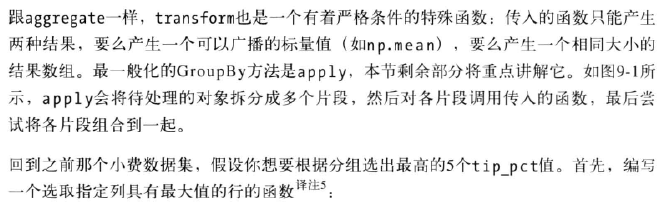

In [65]:
Image(filename="picture\Apply.png")

In [80]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [79]:
print tips.groupby('smoker').apply(top)
print 
print tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345


total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [78]:
result = tips.groupby('smoker')['tip_pct'].describe()
print result
result.unstack('smoker')

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64


smoker,No,Yes
count,151.000000,93.000000
mean,0.159328,0.163196
std,0.039910,0.085119
min,0.056797,0.035638
25%,0.136906,0.106771
50%,0.155625,0.153846
75%,0.185014,0.195059
max,0.291990,0.710345


In [97]:
print tips.groupby('smoker').apply(top)
tips.groupby('smoker', group_keys=False).apply(top) # 禁止分组键

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345


,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [77]:
f = lambda x: x.describe()
grouped.apply(f)

total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.270000   2.880000   2.000000   0.173913
              75%     22.120000   3.500000   2.000000   0.198216
              max     44.300000   6.500000   4.000000   0.416667
Male   No     count   97.000000  97.000000  97.000000  97.000000
              mean    19.791237   3.113402   2.711340   0.160669
              std      8.726566   1.489559   0.989094   0.041849
              min      7.510000   1.250000   2.000000   0.071804
              25%     13.810000   2.000000   2.000000   0.131810
              50%     18.240000   2.740000   2.000000   0.157604
              75%     22.820000   3.710000   3.000000   0.186220
              max     48.330000   9.000000   6.000000   0.291990
       Yes    count   60.000000  60.000000  60.000000  60.000000
              mean    22.284500   3.051167   2.500000   0.152771
              std      9.911845   1.500120   0.892530   0.090588
              min      7.250000   1.000000   1.000000   0.035638
              25%     15.272500   2.000000   2.000000   0.101845
              50%     20.390000   3.000000   2.000000   0.141015
              75%     28.572500   3.820000   3.000000   0.191697
              max     50.810000  10.000000   5.000000   0.710345

### 2 分位数（quantile）和桶分析（bucket）

In [102]:
frame = DataFrame({'data1': np.random.randn(1000),'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
# print factor
factor[:10]

0     (-1.109, 0.298]
1      (0.298, 1.705]
2      (0.298, 1.705]
3     (-1.109, 0.298]
4     (-1.109, 0.298]
5      (0.298, 1.705]
6    (-2.521, -1.109]
7      (0.298, 1.705]
8     (-1.109, 0.298]
9      (0.298, 1.705]
Name: data1, dtype: category
Categories (4, object): [(-2.521, -1.109] < (-1.109, 0.298] < (0.298, 1.705] < (1.705, 3.112]]

In [104]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
    'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor) # 由cut返回的对象可直接用于groupby
print grouped
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.521, -1.109]",113,2.778406,-0.033486,-2.615494
"(-1.109, 0.298]",504,2.908592,-0.017832,-3.316983
"(0.298, 1.705]",337,2.643397,0.008808,-3.250365
"(1.705, 3.112]",46,2.733598,-0.066822,-2.453563


In [107]:
# Return quantile numbers
# 以上是区间大小相同的桶，根据样本分位数得到数据点数量相等的桶，传入labels = False
grouping = pd.qcut(frame.data1, 10, labels=False) 
grouped = frame.data2.groupby(grouping)
# print grouping
# print grouping
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100,2.778406,-0.057028,-2.615494
1,100,2.908592,0.000132,-3.316983
2,100,2.109617,-0.076422,-2.680205
3,100,2.234512,-0.077395,-2.164845
4,100,1.848888,0.057436,-1.841587
5,100,2.133210,0.000578,-1.969705
6,100,2.411869,0.108894,-3.022312
7,100,2.643397,0.090193,-1.959981
8,100,2.092811,-0.035173,-3.250365


### 3 示例：用特定于分组的值填充缺失值

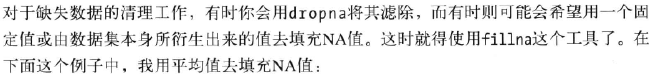

In [108]:
Image(filename="picture\Filling Missing Values with Group-specific Values.png")

In [112]:
s = Series(np.random.randn(6))

print s
print 
s[::2] = np.nan
print s
s.fillna(s.mean())    

0    0.846989
1    0.932653
2    0.580721
3    0.424334
4    1.696036
5    2.148086
dtype: float64

0         NaN
1    0.932653
2         NaN
3    0.424334
4         NaN
5    2.148086
dtype: float64


0    1.168357
1    0.932653
2    1.168357
3    0.424334
4    1.168357
5    2.148086
dtype: float64

In [116]:
states = ['Ohio', 'New York', 'Vermont', 'Florida','Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)

print data
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -3.138639
New York      0.103165
Vermont       0.671246
Florida       0.071951
Oregon       -0.822872
Nevada       -0.757651
California    1.517761
Idaho        -0.437495
dtype: float64


Ohio         -3.138639
New York      0.103165
Vermont            NaN
Florida       0.071951
Oregon       -0.822872
Nevada             NaN
California    1.517761
Idaho              NaN
dtype: float64

In [121]:
print data.groupby(group_key).mean()
fill_mean = lambda g: g.fillna(g.mean())
print 
print data.groupby(group_key).apply(fill_mean) # 分组平均值填充NA

fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func) # 预定义各组的填充值

East   -0.987841
West    0.347444
dtype: float64

Ohio         -3.138639
New York      0.103165
Vermont      -0.987841
Florida       0.071951
Oregon       -0.822872
Nevada        0.347444
California    1.517761
Idaho         0.347444
dtype: float64


Ohio         -3.138639
New York      0.103165
Vermont       0.500000
Florida       0.071951
Oregon       -0.822872
Nevada       -1.000000
California    1.517761
Idaho        -1.000000
dtype: float64

### 4 示例：随机采样和排列

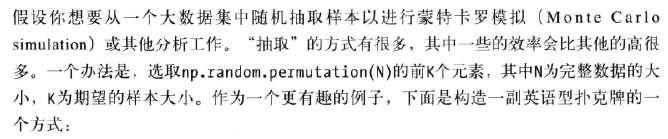

In [123]:
Image(filename="picture\Random Sampling and Permutation.png")

In [127]:
# 红桃（Hearts）, 黑桃（Spades）,梅花（ Clubs）,方片（ Diamonds）
suits = ['H', 'S', 'C', 'D']
card_val = (range(1, 11) + [10] * 3) * 4
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']
print card_val
print 
print base_names

cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)
print deck
deck[:13]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']
AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64


AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [129]:
def draw(deck, n=5): # 从整副牌中抽出5张
    return deck.take(np.random.permutation(len(deck))[:n])

draw(deck)

4C    4
AS    1
2H    2
AC    1
5S    5
dtype: int64

In [131]:
get_suit = lambda card: card[-1] # 只要最后一个字母就可以了

print deck.groupby(get_suit).apply(draw, n=2) # 从每种花色中随机抽取两张牌
deck.groupby(get_suit, group_keys=False).apply(draw, n=2) # 另一种方法

C  6C      6
   JC     10
D  9D      9
   6D      6
H  KH     10
   6H      6
S  10S    10
   8S      8
dtype: int64


3C    3
7C    7
9D    9
AD    1
AH    1
2H    2
9S    9
8S    8
dtype: int64

### 5 示例：分组加权平均数和相关系数

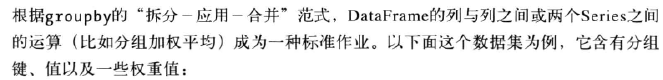

In [132]:
Image(filename="picture\Group Weighted Average and Correlation.png")

In [ ]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],'data': np.random.randn(8),
 'weights': np.random.rand(8)})

grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)

close_px[-4:]

rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### 6 示例：面向分组的线性回归

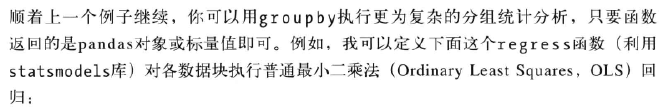

In [133]:
Image(filename="picture\Group-wise Linear Regression.png")

In [134]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

ImportError: No module named statsmodels.api

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])